# Project: Wrangling and Analyze Data

## Data Gathering
In this section, **all** three pieces of data for this project would be gathered and loaded in the notebook using different methods as provided in the project guidelines.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv) that was provided

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#create a dataframe of the twitter archive that was provided
df1_archived = pd.read_csv('twitter-archive-enhanced.csv')
df1_archived.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#use programmatic method to download the image prediction data

import requests
import os

In [4]:
folder_name = 'Project 2'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

In [6]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [7]:
os.listdir(folder_name)

In [8]:
df2_image = pd.read_csv('image-predictions.tsv', sep = '\t')
df2_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [9]:
#use twitter API to download the tweets we have the correspondng tweet IDs

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [10]:
consumer_key = 'My Key'
consumer_secret = 'My Secret'
access_token = 'My Token'
access_secret = 'My Access Secret'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

I used the code below as provided by the file in the Udacity Project Page to download the tweets with the available tweet IDs

In [11]:
tweet_ids = df1_archived.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [12]:
#Save the tweet_json.txt as tweet_json.json and load into a pandas dataframe as below

df3_api = pd.read_json("tweet_json.json", lines = True)
df3_api.head()


,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [13]:
#Save this json dataframe as a csv file for easy visual assessment out the jupyter notebook 

df3_api.to_csv('tweet_api.csv', index = False)

In [14]:
#create a new API dataframe from this csv file

df_api = pd.read_csv('tweet_api.csv')
df_api.shape

(2327, 32)

In [15]:
print(df1_archived.shape)
print(df2_image.shape)
print(df3_api.shape)

(2356, 17)
(2075, 12)
(2327, 32)


## Assessing Data
In this section, we would detect and document at least **eight (8) quality issues and two (2) tidiness issue** using **both** visual assessment programmatic assessement to assess the data.

All three datasets are visually inspected using jupyter lab's functionality to view csv files in tabular formats



In [16]:
df1_archived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [17]:
df1_archived.duplicated().sum()

0

In [18]:
df1_archived.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [19]:
df1_archived.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
df2_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
df2_image.duplicated().sum()

0

In [22]:
df2_image.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [23]:
df2_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [24]:
#dropping some columns very early as they would add no value later

df_api.drop(columns = ['truncated', 'display_text_range', 'source', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 
                       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'favorited', 'possibly_sensitive', 
                       'possibly_sensitive_appealable','lang', 'quoted_status_id', 'quoted_status_id_str', 'created_at', 
                       'place', 'contributors', 'id_str', 'entities', 'in_reply_to_status_id', 
                       'retweeted', 'in_reply_to_status_id_str', 'quoted_status_permalink', 'quoted_status'], inplace = True)

In [25]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 2327 non-null   int64 
 1   full_text          2327 non-null   object
 2   extended_entities  2057 non-null   object
 3   is_quote_status    2327 non-null   bool  
 4   retweet_count      2327 non-null   int64 
 5   favorite_count     2327 non-null   int64 
 6   retweeted_status   160 non-null    object
dtypes: bool(1), int64(3), object(3)
memory usage: 111.5+ KB


In [26]:
df_api.duplicated().sum()

0

In [27]:
df_api.isnull().sum()

id                      0
full_text               0
extended_entities     270
is_quote_status         0
retweet_count           0
favorite_count          0
retweeted_status     2167
dtype: int64

In [28]:
df_api.describe()

,id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2461.379029,7033.918780
std,6.820795e+16,4168.713423,10930.327866
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,492.500000,1221.000000
50%,7.178418e+17,1147.000000,3041.000000
75%,7.986547e+17,2847.500000,8575.000000
max,8.924206e+17,70432.000000,144415.000000


### Quality issues

#### downloaded tweets archive *(df1_archived)*

    1. Some rows have corressponding denominator ratings greater than 10 with the highest being 170. (Programmatic inspection revealed the highest value as 170 while visual inspection showed that there were a few others). 


    2. In addition to the observation in the denominator, the numerator column has some of its values much higher than 14 which is supposed to be the highest rating dogs normally get. The max value observed is 1776 (This observation was achieved by both visual and programmatic assessment)


    3. tweet_id 731156023742988288 has a rating for the dog as 204/170, tweet_id 758467244762497024 has a rating for the dog as 165/150 


    4. tweet_id 666287406224695296 has a rating for the dog as 1/2 instead of 9/10 while tweet_id 775096608509886464 has a rating for the dog as 9/11 instead of 14/10 and then tweet_id 722974582966214656 has a rating for the dog as 4/20 instead of 13/10


    5. tweet_id 778027034220126208 has a numerator rating for the dog as 25 instead of 11.25 while tweet_id 786709082849828864 has a numerator rating for the dog as 75 instead of 9.75


    6. Timestamp column in should be datetime datatype not object


    7. Some rows in the expanded url column have no values indicating the tweets do not have pictures


    8. Values in the source column can be streamlined to clearly capture the devices


    9. some rows have values such as "a", "quite", "my", "his", "one", "an", "very", "just", "this" and some other similar variations in the dog name column that are not actually the dogs' names.





#### image prediction table *(df2_image)*


    1. The letter cases for breeds of dogs are not uniform.


    2. The dog breeds have underscores


    3. Some of the images are not dogs


#### downloaded tweets via API *(df_api)*


    1. The *(df_api)* has the tweet id column named as id while *(df1_archived)* and *(df2_image)* tables have the tweet id columns named as tweet_id


### Tidiness issues

    1. The dog stages (doggo, floofer, pupper and puppo) in the archive download table *(df1_archived)* are in for different columns instead of a single column.


    2. There are several columns not required for the analysis.



    3. All the three tables can be combined to a single table.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [29]:
# Make copies of original pieces of data

df1_clean = df1_archived.copy()
df2_clean = df2_image.copy()
df3_clean = df_api.copy()

### Issue #1
#### downloaded tweets archive *(df1_archived)*

#### Define

This dataframe has some inconsistent values in the numerator and denominator columns that we need to clean. We would use various programmatic methods to achieve this result

Additionally, we would delete some of the columns not required for our analysis.

We would also be deleting rows in the table that have information for tweets that are retweets as well as rows that do not have picture url

Furthermore, we would be adjusting the datatypes of some columns to the right datatypes

In [30]:
df1_clean.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

#### Coding

#### Remove columns not required for analysis (Tidiness)

In [31]:
#delete some columns not required in order to properly capture the table heading

df1_clean.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_timestamp', 
                    'retweeted_status_user_id'], inplace = True)

In [32]:
list(df1_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

   #### Cleaning the numerators and denominators accordingly (Quality issues 1 - 5)

In [33]:
# All values in the denominator are expected to be equal to 10, so we check for all rows that the denominator column is not 10 
# and check each according to its merit

df1_clean[df1_clean['rating_denominator'] != 10]

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


#### Visual assessment for each of the above was carried out to determine what the correct ratings should be.
#### Ratings for retweets and tweets without pictures would be dropped while the others would be updated with the correct ratings according to the denominator of each


In [34]:
#using the method below to replace the values in the numerator and denominators

df1_clean.at[1068, 'rating_numerator'] = 14
df1_clean.at[1068, 'rating_denominator'] = 10
df1_clean.loc[1068]['rating_numerator'], df1_clean.loc[1068]['rating_denominator']

(14, 10)

In [35]:
df1_clean.at[1165, 'rating_numerator'] = 13
df1_clean.at[1165, 'rating_denominator'] = 10
df1_clean.loc[1165]['rating_numerator'], df1_clean.loc[1165]['rating_denominator']

(13, 10)

In [36]:
df1_clean.at[1202, 'rating_numerator'] = 11
df1_clean.at[1202, 'rating_denominator'] = 10
df1_clean.loc[1202]['rating_numerator'], df1_clean.loc[1202]['rating_denominator']

(11, 10)

In [37]:
df1_clean.at[1662, 'rating_numerator'] = 10
df1_clean.at[1662, 'rating_denominator'] = 10
df1_clean.loc[1662]['rating_numerator'], df1_clean.loc[1662]['rating_denominator']

(10, 10)

In [38]:
df1_clean.at[2335, 'rating_numerator'] = 9
df1_clean.at[2335, 'rating_denominator'] = 10
df1_clean.loc[2335]['rating_numerator'], df1_clean.loc[2335]['rating_denominator']

(9, 10)

In [39]:
#replacing the numerators and denominators that were provided as a multiple of certain numbers

df1_clean['rating_numerator'] = df1_clean['rating_numerator'].replace(84, 84/7)
df1_clean['rating_denominator'] = df1_clean['rating_denominator'].replace(70, 70/7)
df1_clean.loc[433]['rating_numerator'], df1_clean.loc[433]['rating_denominator']

(12, 10)

In [40]:
df1_clean['rating_numerator'] = df1_clean['rating_numerator'].replace(165, 165/15)
df1_clean['rating_denominator'] = df1_clean['rating_denominator'].replace(150, 150/15)
df1_clean.loc[902]['rating_numerator'], df1_clean.loc[902]['rating_denominator']

(11, 10)

In [41]:
df1_clean['rating_numerator'] = df1_clean['rating_numerator'].replace(204, 204/17)
df1_clean['rating_denominator'] = df1_clean['rating_denominator'].replace(170, 170/17)
df1_clean.loc[1120]['rating_numerator'], df1_clean.loc[1120]['rating_denominator']

(12, 10)

In [42]:
df1_clean['rating_numerator'] = df1_clean['rating_numerator'].replace(99, 99/9)
df1_clean['rating_denominator'] = df1_clean['rating_denominator'].replace(90, 90/9)
df1_clean.loc[1228]['rating_numerator'], df1_clean.loc[1228]['rating_denominator']

(11, 10)

In [43]:
df1_clean['rating_numerator'] = df1_clean['rating_numerator'].replace(80, 80/8)
df1_clean['rating_denominator'] = df1_clean['rating_denominator'].replace(80, 80/8)
df1_clean.loc[1254]['rating_numerator'], df1_clean.loc[1254]['rating_denominator']

(10, 10)

In [44]:
df1_clean['rating_numerator'] = df1_clean['rating_numerator'].replace(45, 45/5)
df1_clean['rating_denominator'] = df1_clean['rating_denominator'].replace(50, 50/5)
df1_clean.loc[1274]['rating_numerator'], df1_clean.loc[1274]['rating_denominator']

(9, 10)

In [45]:
df1_clean['rating_numerator'] = df1_clean['rating_numerator'].replace(60, 60/5)
df1_clean['rating_denominator'] = df1_clean['rating_denominator'].replace(50, 50/5)
df1_clean.loc[1351]['rating_numerator'], df1_clean.loc[1351]['rating_denominator']

(12, 10)

In [46]:
df1_clean['rating_numerator'] = df1_clean['rating_numerator'].replace(44, 44/4)
df1_clean['rating_denominator'] = df1_clean['rating_denominator'].replace(40, 40/4)
df1_clean.loc[1433]['rating_numerator'], df1_clean.loc[1433]['rating_denominator']

(11, 10)

In [47]:
df1_clean['rating_numerator'] = df1_clean['rating_numerator'].replace(143, 143/13)
df1_clean['rating_denominator'] = df1_clean['rating_denominator'].replace(130, 130/13)
df1_clean.loc[1634]['rating_numerator'], df1_clean.loc[1634]['rating_denominator']

(11, 10)

In [48]:
df1_clean['rating_numerator'] = df1_clean['rating_numerator'].replace(121, 121/11)
df1_clean['rating_denominator'] = df1_clean['rating_denominator'].replace(110, 110/11)
df1_clean.loc[1635]['rating_numerator'], df1_clean.loc[1635]['rating_denominator']

(11, 10)

In [49]:
df1_clean['rating_numerator'] = df1_clean['rating_numerator'].replace(144, 144/12)
df1_clean['rating_denominator'] = df1_clean['rating_denominator'].replace(120, 120/12)
df1_clean.loc[1779]['rating_numerator'], df1_clean.loc[1779]['rating_denominator']

(12, 10)

In [50]:
df1_clean['rating_numerator'] = df1_clean['rating_numerator'].replace(88, 88/8)
df1_clean['rating_denominator'] = df1_clean['rating_denominator'].replace(80, 80/8)
df1_clean.loc[1843]['rating_numerator'], df1_clean.loc[1843]['rating_denominator']

(11, 10)

In [51]:
#check for the remaining denominators after correcting those above

df1_clean[df1_clean['rating_denominator'] != 10]

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,11,15,None,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1598,686035780142297088,2016-01-10 04:04:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Yes I do realize a rating of 4/20 would've bee...,NaN,NaN,4,20,None,None,None,None,None
1663,682808988178739200,2016-01-01 06:22:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I'm aware that I could've said 20/16, but here...",NaN,NaN,20,16,None,None,None,None,None


In [52]:
#The remaining denominators with values greater than 10 where in tweets that are not dog rating tweets, hence we delete them

df1_clean.drop([df1_clean.index[313], df1_clean.index[342], df1_clean.index[516], df1_clean.index[784], 
                          df1_clean.index[1598], df1_clean.index[1663]], inplace = True)

In [53]:
df1_clean[df1_clean['rating_denominator'] != 10]

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [54]:
#check for the numerators that have values above 14 because 14 is usually the maximum ratings for dogs in their twitter handle

df1_clean[df1_clean['rating_numerator'] > 14]

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,666,10,None,None,None,None,None
285,838916489579200512,2017-03-07 00:57:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @KibaDva: I collected all the good dogs!! 1...,8.389060e+17,https://twitter.com/KibaDva/status/83890598062...,15,10,None,None,None,None,None
290,838150277551247360,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,182,10,None,None,None,None,None
291,838085839343206401,2017-03-04 17:56:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@bragg6of8 @Andy_Pace_ we are still looking fo...,NaN,NaN,15,10,None,None,None,None,None
340,832215909146226688,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
695,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
979,749981277374128128,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [55]:
# index 55, 188, 189, 290, 291 are replies to tweets and do not contain pictures and would be deleted
# index 285, 340 are retweets and would be deleted
# index 979 and 2074 are the actual values but they are outliers and would be deleted
# index 695 has an actual rating of 9.75, while index 763 has an actual rating of 11.27 and index 1712 has an actual rating of 11.26. These would be updated

df1_clean.drop(df1_clean.index[[55, 188, 189, 290, 291, 285, 340, 979, 2074]], inplace = True)

In [56]:
#Replace the values of the remaining numerators accordingly

df1_clean['rating_numerator'] = df1_clean['rating_numerator'].replace(75, 9.75)
df1_clean['rating_numerator'] = df1_clean['rating_numerator'].replace(27, 11.27)
df1_clean['rating_numerator'] = df1_clean['rating_numerator'].replace(26, 11.26)

In [57]:
df1_clean[df1_clean['rating_numerator'] > 14]

# index 979 and 2074 not deleting

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,https://twitter.com/dog_rates/status/749981277...,1776.0,10,Atticus,None,None,None,None
2074,670842764863651840,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,NaN,https://twitter.com/dog_rates/status/670842764...,420.0,10,None,None,None,None,None


In [58]:
df1_clean.drop(df1_clean.index[[979, 2074]], inplace = True)

In [59]:
df1_clean[df1_clean['rating_numerator'] > 14]

#I am not sure yet why these are not deleting, so I leave them for now
# Investigate later

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,https://twitter.com/dog_rates/status/749981277...,1776.0,10,Atticus,None,None,None,None
2074,670842764863651840,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,NaN,https://twitter.com/dog_rates/status/670842764...,420.0,10,None,None,None,None,None


#### Convert timestamp column to datetime datatype and the numerator ratings to int from float that resulted from the division operations above

In [60]:
df1_clean.shape
df1_clean.dtypes

tweet_id                 int64
timestamp               object
source                  object
text                    object
retweeted_status_id    float64
expanded_urls           object
rating_numerator       float64
rating_denominator       int64
name                    object
doggo                   object
floofer                 object
pupper                  object
puppo                   object
dtype: object

In [61]:
#convert the timestamp to datetime datatype

df1_clean['timestamp'] = pd.to_datetime(df1_clean['timestamp'])

In [62]:
#convert numerator to int datatype

df1_clean['rating_numerator'] = df1_clean['rating_numerator'].astype(int)

In [63]:
df1_clean.dtypes

tweet_id                             int64
timestamp              datetime64[ns, UTC]
source                              object
text                                object
retweeted_status_id                float64
expanded_urls                       object
rating_numerator                     int32
rating_denominator                   int64
name                                object
doggo                               object
floofer                             object
pupper                              object
puppo                               object
dtype: object

#### Delete all rows with retweets

In [64]:
df1_clean.shape

(2339, 13)

In [65]:
#check rows that have retweets

df1_clean['retweeted_status_id'].notna().sum()

178

In [66]:
#delete rows with retweets

df1_clean = df1_clean[~df1_clean['retweeted_status_id'].notna()]

In [67]:
#confirm deletion

df1_clean['retweeted_status_id'].notna().sum()

0

In [68]:
df1_clean.shape

(2161, 13)

#### Delete rows that do not have picture url

In [69]:
#check for rows without picture urls

df1_clean['expanded_urls'].isna().sum()

49

In [70]:
#delete those rows from the dataframe

df1_clean = df1_clean[~df1_clean['expanded_urls'].isna()]

In [71]:
#confirm deletion

df1_clean['expanded_urls'].isna().sum()

0

In [72]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2112 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   tweet_id             2112 non-null   int64              
 1   timestamp            2112 non-null   datetime64[ns, UTC]
 2   source               2112 non-null   object             
 3   text                 2112 non-null   object             
 4   retweeted_status_id  0 non-null      float64            
 5   expanded_urls        2112 non-null   object             
 6   rating_numerator     2112 non-null   int32              
 7   rating_denominator   2112 non-null   int64              
 8   name                 2112 non-null   object             
 9   doggo                2112 non-null   object             
 10  floofer              2112 non-null   object             
 11  pupper               2112 non-null   object             
 12  puppo               

In [73]:
#delete the retweet column as it is no longer needed

df1_clean = df1_clean.drop(columns = 'retweeted_status_id')

In [74]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2112 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2112 non-null   int64              
 1   timestamp           2112 non-null   datetime64[ns, UTC]
 2   source              2112 non-null   object             
 3   text                2112 non-null   object             
 4   expanded_urls       2112 non-null   object             
 5   rating_numerator    2112 non-null   int32              
 6   rating_denominator  2112 non-null   int64              
 7   name                2112 non-null   object             
 8   doggo               2112 non-null   object             
 9   floofer             2112 non-null   object             
 10  pupper              2112 non-null   object             
 11  puppo               2112 non-null   object             
dtypes: datetime64[ns, UTC](1), int32(1

#### Clean up the values in the source column to only specific devices

In [75]:
#we may do an analysis on the device types people frequently use to engage with the tweets
#check the values in the column

df1_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1980
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [76]:
#Replace the entire lengthy values to just the devices only

df1_clean['source'] = df1_clean['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 
                                                      'Twitter for iPhone')
df1_clean['source'] = df1_clean['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 
                                                      'Make a Scene')
df1_clean['source'] = df1_clean['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 
                                                      'Twitter Web Client')
df1_clean['source'] = df1_clean['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 
                                                      'TweetDeck')

C:\Users\aneru\AppData\Local\Temp\ipykernel_26704\3797201045.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df1_clean['source'] = df1_clean['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
C:\Users\aneru\AppData\Local\Temp\ipykernel_26704\3797201045.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df1_clean['source'] = df1_clean['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
C:\Users\aneru\AppData\Local\Temp\ipykernel_26704\3797201045.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df1_clean['source'] = df1_clean['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
C:\Users\aneru\AppData\Local\Temp\ipykernel_26704\3797201045.py:9: FutureWarning: The default value of regex will change from 

In [77]:
#verify the output

df1_clean['source'].value_counts()

Twitter for iPhone    1980
Make a Scene            91
Twitter Web Client      30
TweetDeck               11
Name: source, dtype: int64

In [78]:
df1_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [79]:
#check for the names of the dogs for accuracy

df1_clean['name'].value_counts()

#this is a big task that would not provide extra value to the analysis, hence we would not be cleaning this as we would drop it later

None          621
a              55
Lucy           11
Charlie        11
Oliver         10
             ... 
Wishes          1
Rose            1
Theo            1
Fido            1
Christoper      1
Name: name, Length: 955, dtype: int64

#### Assess the dog stages to know the unique number of each in the respective columns

In [80]:
#Check how many doggo in the data

df1_clean['doggo'].value_counts()

None     2028
doggo      84
Name: doggo, dtype: int64

In [81]:
#Check how many floofer in the data

df1_clean['floofer'].value_counts()

None       2102
floofer      10
Name: floofer, dtype: int64

In [82]:
#Check how many pupper in the data

df1_clean['pupper'].value_counts()

None      1880
pupper     232
Name: pupper, dtype: int64

In [83]:
#Check how many puppo in the data

df1_clean['puppo'].value_counts()

None     2088
puppo      24
Name: puppo, dtype: int64

### Testing

In [84]:
df1_clean.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                    int32
rating_denominator                  int64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

In [85]:
df1_clean.duplicated().sum()

0

In [86]:
df1_clean.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

In [87]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2112 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2112 non-null   int64              
 1   timestamp           2112 non-null   datetime64[ns, UTC]
 2   source              2112 non-null   object             
 3   text                2112 non-null   object             
 4   expanded_urls       2112 non-null   object             
 5   rating_numerator    2112 non-null   int32              
 6   rating_denominator  2112 non-null   int64              
 7   name                2112 non-null   object             
 8   doggo               2112 non-null   object             
 9   floofer             2112 non-null   object             
 10  pupper              2112 non-null   object             
 11  puppo               2112 non-null   object             
dtypes: datetime64[ns, UTC](1), int32(1

### Issue #2
#### Image Prediction Table

#### Define

This table needs has the predictions for dog breeds as well as images that are not dogs. We would use various programmatic coding to pick only one dog breed from all three predictions and then delete rows that do not correspond to a dog.

Additionally, we would be cleaning the dog breed columns to have uniform lettering

In [88]:
df2_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [89]:
df2_clean.shape

(2075, 12)

#### Code

Cleaning the spelling of the dog breed naming

In [90]:
#Make all the first letters title since some are already titled case

df2_clean['p1'] = df2_clean['p1'].str.title()
df2_clean['p2'] = df2_clean['p2'].str.title()
df2_clean['p3'] = df2_clean['p3'].str.title()

In [91]:
df2_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [92]:
#Replace the uderscores with space

df2_clean['p1'] = df2_clean['p1'].str.replace('_', ' ')
df2_clean['p2'] = df2_clean['p2'].str.replace('_', ' ')
df2_clean['p3'] = df2_clean['p3'].str.replace('_', ' ')

In [93]:
df2_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Cleaning to remove images that do not correspond to dogs in the image prediction model

In [94]:
df2_clean.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [95]:
#create a new column to populate the dog breeds

df2_clean['dog_breed'] = np.nan

In [96]:
#iterate through the p1, p2 and p3 predictions to select only columns with a confirmed dog breed, starting with p1, then p2 & p3

for i in range(len(df2_clean)):
    if df2_clean['p1_dog'][i] == 1:
        df2_clean['dog_breed'][i] = df2_clean['p1'][i]
    elif df2_clean['p2_dog'][i] == 1:
        df2_clean['dog_breed'][i] = df2_clean['p2'][i]
    elif df2_clean['p3_dog'][i] == 1:
        df2_clean['dog_breed'][i] = df2_clean['p3'][i]

C:\Users\aneru\AppData\Local\Temp\ipykernel_26704\4255538377.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_clean['dog_breed'][i] = df2_clean['p1'][i]


In [97]:
#view the table to confirm dog breed column has been correctly populated

df2_clean.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True,Welsh Springer Spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True,Redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,German Shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True,Rhodesian Ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,Miniature Pinscher
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese Mountain Dog,0.651137,True,English Springer,0.263788,True,Greater Swiss Mountain Dog,0.016199,True,Bernese Mountain Dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box Turtle,0.933012,False,Mud Turtle,0.045885,False,Terrapin,0.017885,False,NaN
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517,True,Tibetan Mastiff,0.058279,True,Fur Coat,0.054449,False,Chow
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping Cart,0.962465,False,Shopping Basket,0.014594,False,Golden Retriever,0.007959,True,Golden Retriever
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature Poodle,0.201493,True,Komondor,0.192305,True,Soft-Coated Wheaten Terrier,0.082086,True,Miniature Poodle


In [98]:
#check rows that do not have dog breeds

df2_clean['dog_breed'].isna().sum()

324

In [99]:
#drop all rows that do not correspond to a dog breed

df2_clean.dropna(inplace = True)

In [100]:
df2_clean.isna().sum()

tweet_id     0
jpg_url      0
img_num      0
p1           0
p1_conf      0
p1_dog       0
p2           0
p2_conf      0
p2_dog       0
p3           0
p3_conf      0
p3_dog       0
dog_breed    0
dtype: int64

In [101]:
df2_clean.shape

(1751, 13)

Remove all other columns not required

In [102]:
list(df2_clean)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'dog_breed']

In [103]:
#Drop all other columns

df2_clean.drop(columns = ['jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 
                         'p3', 'p3_conf', 'p3_dog'], inplace = True)

In [104]:
#Confirm column drop

list(df2_clean)

['tweet_id', 'dog_breed']

### Test

In [105]:
df2_clean.dtypes

tweet_id      int64
dog_breed    object
dtype: object

In [106]:
df2_clean.duplicated().sum()

0

In [107]:
df2_clean.isna().sum()

tweet_id     0
dog_breed    0
dtype: int64

In [108]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   1751 non-null   int64 
 1   dog_breed  1751 non-null   object
dtypes: int64(1), object(1)
memory usage: 41.0+ KB


### Issue #3
#### API downloaded table

#### Define

This table has the tweet ID column as id while the other two tables have it as tweet_ID. We would be renaming this column.

Additionally, we would delete all columns not needed for our analysis

Furthermore, we would delete rows that are storing retweeted tweets as well as rows that do not have pictures

In [109]:
df3_clean.head()

,id,full_text,extended_entities,is_quote_status,retweet_count,favorite_count,retweeted_status
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,"{'media': [{'id': 892420639486877696, 'id_str'...",False,6979,33728,NaN
1,892177421306343426,This is Tilly. She's just checking pup on you....,"{'media': [{'id': 892177413194625024, 'id_str'...",False,5280,29255,NaN
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,"{'media': [{'id': 891815175371796480, 'id_str'...",False,3466,21986,NaN
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,"{'media': [{'id': 891689552724799489, 'id_str'...",False,7199,36819,NaN
4,891327558926688256,This is Franklin. He would like you to stop ca...,"{'media': [{'id': 891327551943041024, 'id_str'...",False,7722,35212,NaN


In [110]:
df3_clean.shape

(2327, 7)

In [111]:
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 2327 non-null   int64 
 1   full_text          2327 non-null   object
 2   extended_entities  2057 non-null   object
 3   is_quote_status    2327 non-null   bool  
 4   retweet_count      2327 non-null   int64 
 5   favorite_count     2327 non-null   int64 
 6   retweeted_status   160 non-null    object
dtypes: bool(1), int64(3), object(3)
memory usage: 111.5+ KB


#### Code

In [112]:
df3_clean.duplicated().sum()

0

In [113]:
#verify the rows with missing picture url

df3_clean['extended_entities'].isna().sum()

270

In [114]:
#verify the rows with retweets

df3_clean['retweeted_status'].notna().sum()

160

In [115]:
df3_clean.isna().sum()

id                      0
full_text               0
extended_entities     270
is_quote_status         0
retweet_count           0
favorite_count          0
retweeted_status     2167
dtype: int64

In [116]:
#We want to delete the rows with retweets only

df3_clean = df3_clean[~df3_clean['retweeted_status'].notna()]

In [117]:
df3_clean['retweeted_status'].notna().sum()

0

In [118]:
df3_clean.isna().sum()

id                      0
full_text               0
extended_entities     181
is_quote_status         0
retweet_count           0
favorite_count          0
retweeted_status     2167
dtype: int64

In [119]:
df3_clean['extended_entities'].isna().sum()

181

In [120]:
#Delete the retweet column so that we can use the dropna function next

df3_clean.drop(columns = ['retweeted_status'], inplace = True)

In [121]:
# delete the remaining rows with no values for image url
df3_clean.dropna(inplace = True)

In [122]:
df3_clean.isna().sum()

id                   0
full_text            0
extended_entities    0
is_quote_status      0
retweet_count        0
favorite_count       0
dtype: int64

In [123]:
#Renaming the tweet ID column

df3_clean.rename(columns = {'id':'tweet_id'}, inplace = True)

### Test

In [124]:
df3_clean.dtypes

tweet_id              int64
full_text            object
extended_entities    object
is_quote_status        bool
retweet_count         int64
favorite_count        int64
dtype: object

In [125]:
df3_clean.duplicated().sum()

0

In [126]:
df3_clean.isnull().sum()

tweet_id             0
full_text            0
extended_entities    0
is_quote_status      0
retweet_count        0
favorite_count       0
dtype: int64

In [127]:
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2326
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tweet_id           1986 non-null   int64 
 1   full_text          1986 non-null   object
 2   extended_entities  1986 non-null   object
 3   is_quote_status    1986 non-null   bool  
 4   retweet_count      1986 non-null   int64 
 5   favorite_count     1986 non-null   int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 95.0+ KB


### Issue #4
#### Tidiness

#### Define

We need to put all the dog stages (doggo, floofer, pupper and puppo) in the four different columns into one column.

Additionally, we need to merge all the tables into one table

In [128]:
#create a copy of the cleaned dataframe 

df_dog_stage = df1_clean.copy()

In [129]:
df_dog_stage.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [130]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2112 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2112 non-null   int64              
 1   timestamp           2112 non-null   datetime64[ns, UTC]
 2   source              2112 non-null   object             
 3   text                2112 non-null   object             
 4   expanded_urls       2112 non-null   object             
 5   rating_numerator    2112 non-null   int32              
 6   rating_denominator  2112 non-null   int64              
 7   name                2112 non-null   object             
 8   doggo               2112 non-null   object             
 9   floofer             2112 non-null   object             
 10  pupper              2112 non-null   object             
 11  puppo               2112 non-null   object             
dtypes: datetime64[ns, UTC](1), int32(1

### Code

In [131]:
#use the melt function to put all the dog stages into a single column and proceed to clean

df_dog_stage = pd.melt(df_dog_stage,
                                    id_vars = ['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator', 'rating_denominator', 'name'],
                                    value_vars = ['doggo', 'floofer', 'pupper', 'puppo'],
                                    var_name='dog_stage', value_name = 'stage'
                                    )

In [132]:
df_dog_stage

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,doggo,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,doggo,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,doggo,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,doggo,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,doggo,None
...,...,...,...,...,...,...,...,...,...
8443,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,puppo,None
8444,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,6,10,a,puppo,None
8445,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,9,10,a,puppo,None
8446,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,7,10,a,puppo,None


In [133]:
#remove the new variable column so that duplicates can be easily identified

df_dog_stage = df_dog_stage.drop(columns = 'dog_stage')

In [134]:
#check for duplicates

df_dog_stage.duplicated().sum()

5986

In [135]:
#drop duplicates

df_dog_stage.drop_duplicates(inplace = True)

In [136]:
#check for duplicates in the tweet_id column

df_dog_stage[df_dog_stage['tweet_id'].duplicated()]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage
2121,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,14,10,Cassie,None
2151,884162670584377345,2017-07-09 21:29:42+00:00,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,12,10,Yogi,None
2154,883360690899218434,2017-07-07 16:22:55+00:00,Twitter for iPhone,Meet Grizzwald. He may be the floofiest floofe...,13,10,Grizzwald,floofer
2198,872967104147763200,2017-06-09 00:02:31+00:00,Twitter for iPhone,Here's a very large dog. He has a date later. ...,12,10,None,None
2206,871515927908634625,2017-06-04 23:56:03+00:00,Twitter for iPhone,This is Napolean. He's a Raggedy East Nicaragu...,12,10,Napolean,None
...,...,...,...,...,...,...,...,...
7077,752519690950500352,2016-07-11 15:07:30+00:00,Twitter for iPhone,Hopefully this puppo on a swing will help get ...,11,10,None,puppo
7090,751132876104687617,2016-07-07 19:16:47+00:00,Twitter for iPhone,This is Cooper. He's just so damn happy. 10/10...,10,10,Cooper,puppo
7158,744995568523612160,2016-06-20 20:49:19+00:00,Twitter for iPhone,This is Abby. She got her face stuck in a glas...,9,10,Abby,puppo
7170,743253157753532416,2016-06-16 01:25:36+00:00,Twitter for iPhone,This is Kilo. He cannot reach the snackum. Nif...,10,10,Kilo,puppo


In [137]:
#check how many duplicates

df_dog_stage['tweet_id'].duplicated().sum()

350

In [138]:
df_dog_stage.shape

(2462, 8)

In [139]:
df_dog_stage['tweet_id'].sort_values().value_counts().head(50)

759793422261743616    3
785639753186217984    3
808106460588765185    3
801115127852503040    3
781308096455073793    3
751583847268179968    3
817777686764523521    3
855851453814013952    3
802265048156610565    3
733109485275860992    3
854010172552949760    3
741067306818797568    3
749075273010798592    2
832032802820481025    2
749317047558017024    2
687312378585812992    2
831939777352105988    2
831322785565769729    2
778039087836069888    2
697616773278015490    2
832273440279240704    2
697596423848730625    2
749417653287129088    2
748932637671223296    2
832998151111966721    2
833124694597443584    2
748692773788876800    2
675740360753160193    2
797971864723324932    2
748337862848962560    2
831315979191906304    2
750011400160841729    2
799757965289017345    2
800018252395122689    2
826848821049180160    2
826958653328592898    2
750506206503038976    2
695074328191332352    2
695095422348574720    2
675334060156301312    2
827933404142436356    2
7503834110685347

In [140]:
df_dog_stage[df_dog_stage['tweet_id'] == 751583847268179968]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage
749,751583847268179968,2016-07-09 01:08:47+00:00,Twitter for iPhone,Please stop sending it pictures that don't eve...,5,10,None,doggo
2861,751583847268179968,2016-07-09 01:08:47+00:00,Twitter for iPhone,Please stop sending it pictures that don't eve...,5,10,None,None
4973,751583847268179968,2016-07-09 01:08:47+00:00,Twitter for iPhone,Please stop sending it pictures that don't eve...,5,10,None,pupper


The efforts required to tidy the dog stages accurately for 350 tweet IDs does not provide extra incentive for our intended analysis, hence, we would proceed to drop them completely

In [141]:
#drop the dog stages value column

df_dog_stage = df_dog_stage.drop(columns = 'stage')

In [142]:
df_dog_stage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2462 entries, 0 to 7204
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2462 non-null   int64              
 1   timestamp           2462 non-null   datetime64[ns, UTC]
 2   source              2462 non-null   object             
 3   text                2462 non-null   object             
 4   rating_numerator    2462 non-null   int32              
 5   rating_denominator  2462 non-null   int64              
 6   name                2462 non-null   object             
dtypes: datetime64[ns, UTC](1), int32(1), int64(2), object(3)
memory usage: 144.3+ KB


In [143]:
#check for duplicates in the dataframe

df_dog_stage.duplicated().sum()

350

In [144]:
#delete this duplicates

df_dog_stage.drop_duplicates(inplace = True)

In [145]:
df_dog_stage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2112 entries, 0 to 2111
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2112 non-null   int64              
 1   timestamp           2112 non-null   datetime64[ns, UTC]
 2   source              2112 non-null   object             
 3   text                2112 non-null   object             
 4   rating_numerator    2112 non-null   int32              
 5   rating_denominator  2112 non-null   int64              
 6   name                2112 non-null   object             
dtypes: datetime64[ns, UTC](1), int32(1), int64(2), object(3)
memory usage: 123.8+ KB


In [146]:
#since we did not end up doing any melting in the df_dog_stage dataframe, we would use the df1_clean dataframe to continue

list(df1_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [147]:
#drop the remaining columns we do not need

df1_clean = df1_clean.drop(columns = ['expanded_urls', 'name', 'doggo', 'floofer', 'pupper', 'puppo'])

In [148]:
print(df1_clean.shape)
list(df1_clean)

(2112, 6)


['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator']

In [149]:
print(df2_clean.shape)
list(df2_clean)

(1751, 2)


['tweet_id', 'dog_breed']

In [150]:
df2_clean['dog_breed'] = pd.Categorical(df2_clean.dog_breed)

In [151]:
list(df3_clean)

['tweet_id',
 'full_text',
 'extended_entities',
 'is_quote_status',
 'retweet_count',
 'favorite_count']

In [152]:
df3_clean = df3_clean.drop(columns = ['full_text', 'extended_entities', 'is_quote_status'])

In [153]:
print(df3_clean.shape)
list(df3_clean)

(1986, 3)


['tweet_id', 'retweet_count', 'favorite_count']

In [154]:
#merge df1_clean with df3_clean

df13_clean = df1_clean.merge(df3_clean, on = 'tweet_id')
df13_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,6979,33728
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,5280,29255
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,3466,21986
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,7199,36819
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,7722,35212


In [155]:
df13_clean.shape

(1981, 8)

In [156]:
df123_clean = df13_clean.merge(df2_clean, on = 'tweet_id')
df123_clean

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,retweet_count,favorite_count,dog_breed
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,5280,29255,Chihuahua
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,3466,21986,Chihuahua
2,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,7199,36819,Labrador Retriever
3,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,7722,35212,Basset
4,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,13,10,2590,17759,Chesapeake Bay Retriever
...,...,...,...,...,...,...,...,...,...
1668,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,5,10,36,88,Miniature Pinscher
1669,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,6,10,115,246,Rhodesian Ridgeback
1670,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,9,10,36,100,German Shepherd
1671,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,7,10,39,112,Redbone


### Test

In [157]:
df123_clean.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                             object
text                               object
rating_numerator                    int32
rating_denominator                  int64
retweet_count                       int64
favorite_count                      int64
dog_breed                        category
dtype: object

In [158]:
df123_clean.duplicated().sum()

0

In [159]:
df123_clean.isna().sum()

tweet_id              0
timestamp             0
source                0
text                  0
rating_numerator      0
rating_denominator    0
retweet_count         0
favorite_count        0
dog_breed             0
dtype: int64

In [160]:
df123_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1673 entries, 0 to 1672
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1673 non-null   int64              
 1   timestamp           1673 non-null   datetime64[ns, UTC]
 2   source              1673 non-null   object             
 3   text                1673 non-null   object             
 4   rating_numerator    1673 non-null   int32              
 5   rating_denominator  1673 non-null   int64              
 6   retweet_count       1673 non-null   int64              
 7   favorite_count      1673 non-null   int64              
 8   dog_breed           1673 non-null   category           
dtypes: category(1), datetime64[ns, UTC](1), int32(1), int64(4), object(2)
memory usage: 117.7+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [161]:
#store the cleaned master data as a csv format
df123_clean.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data

We would analyze and visualize our wrangled data below.

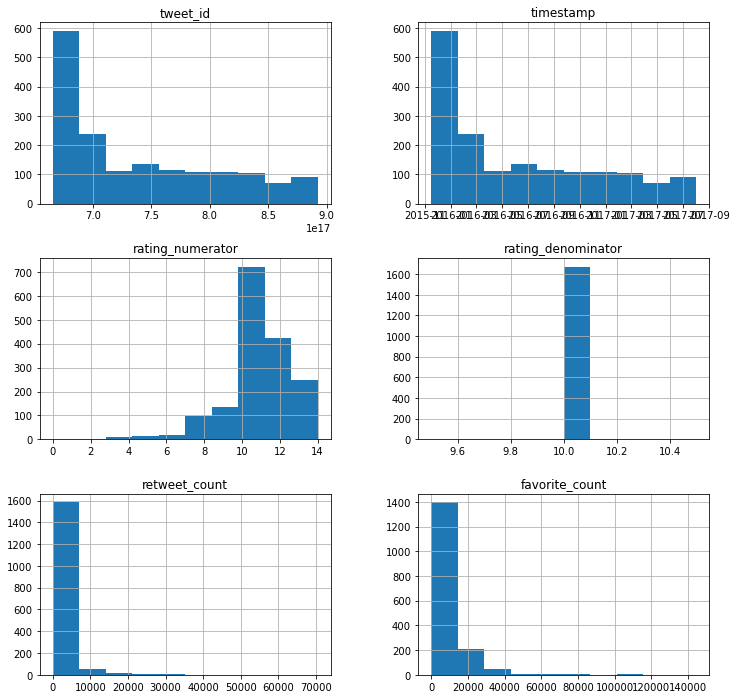

In [162]:
# Use a histogram to get a distribution overview
df123_clean.hist(figsize=(12,12));

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Question 1

Has there been an increase in the interactions this twitter account gets from viewers?

We would answer this by plotting a time series against retweet counts as well as against favorite counts

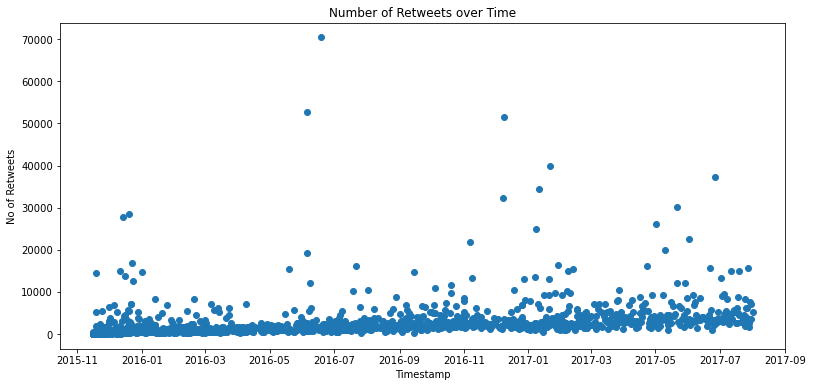

In [163]:
x = df123_clean['timestamp']
y = df123_clean['retweet_count']
plt.rcParams["figure.figsize"] = (13,6)
plt.scatter(x, y);
plt.xlabel("Timestamp")
plt.ylabel("No of Retweets")
plt.title('Number of Retweets over Time');

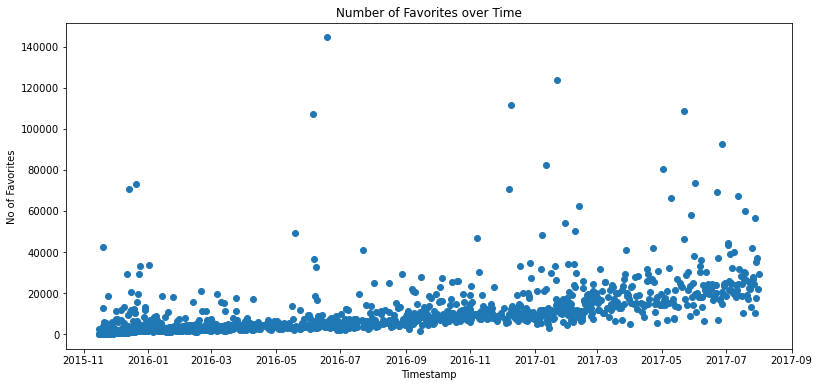

In [164]:
x = df123_clean['timestamp']
y = df123_clean['favorite_count']
plt.rcParams["figure.figsize"] = (13,6)
plt.scatter(x, y);
plt.xlabel("Timestamp")
plt.ylabel("No of Favorites")
plt.title('Number of Favorites over Time');

### Question 2

Is there a correletion between the ratings dogs get to how much people like the tweets and retweet them?

We would answer this by plotting a dog ratings against favorite counts and retweet counts

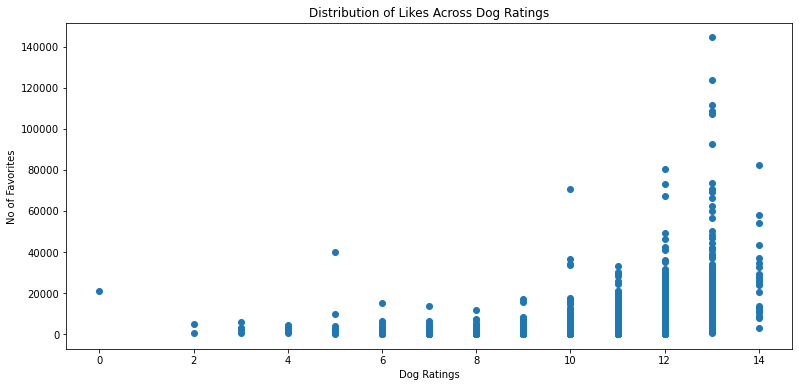

In [165]:
x = df123_clean['rating_numerator']
y = df123_clean['favorite_count']
plt.rcParams["figure.figsize"] = (13,6)
plt.scatter(x, y);
plt.xlabel("Dog Ratings")
plt.ylabel("No of Favorites")
plt.title('Distribution of Likes Across Dog Ratings');

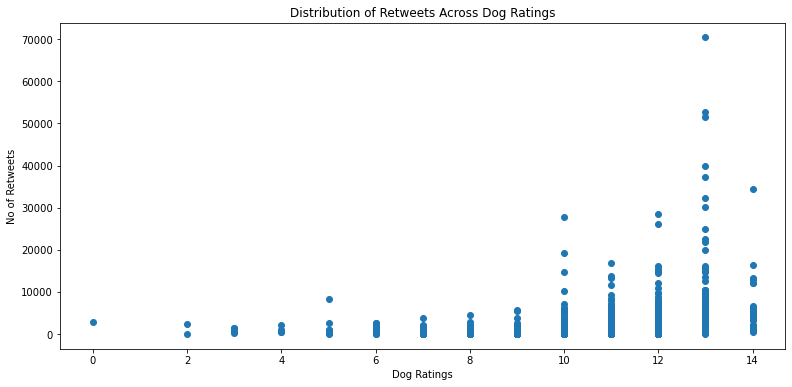

In [166]:
x = df123_clean['rating_numerator']
y = df123_clean['retweet_count']
plt.rcParams["figure.figsize"] = (13,6)
plt.scatter(x, y);
plt.xlabel("Dog Ratings")
plt.ylabel("No of Retweets")
plt.title('Distribution of Retweets Across Dog Ratings');

### Question 3

Is there a direct relationship between the retweets and favorites?

We would answer this by plotting both against each other.

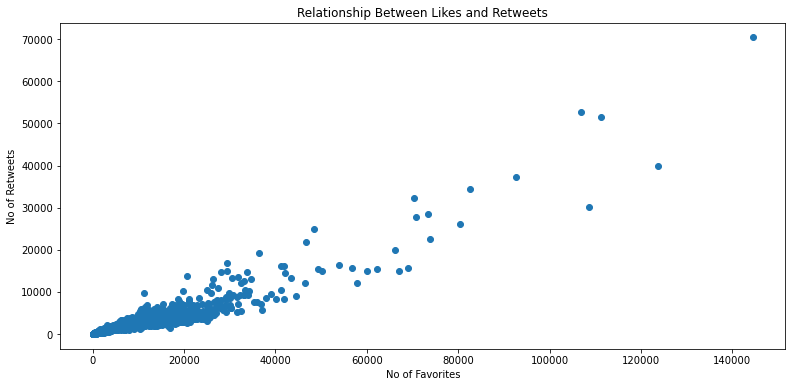

In [167]:
x = df123_clean['favorite_count']
y = df123_clean['retweet_count']
plt.rcParams["figure.figsize"] = (13,6)
plt.scatter(x, y);
plt.xlabel("No of Favorites")
plt.ylabel("No of Retweets")
plt.title('Relationship Between Likes and Retweets');

### Question 4

What dog breeds are the most popularly featured in this twitter account?

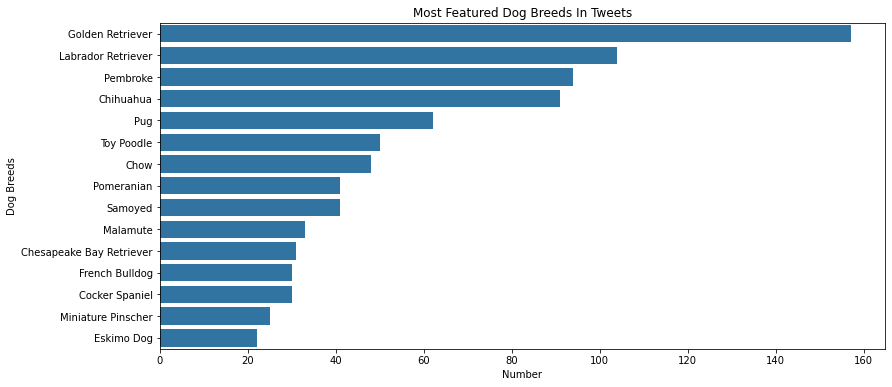

In [168]:
w = df123_clean['dog_breed'].value_counts().index[:15]
base_color = sns.color_palette()[0]
sns.countplot(data = df123_clean, y = df123_clean['dog_breed'], color = base_color, order = w);
plt.xlabel("Number")
plt.ylabel("Dog Breeds")
plt.title('Most Featured Dog Breeds In Tweets');

### Question 5

What do breeds have the highest ratings?

In [169]:
df_top_ratings = df123_clean[df123_clean['rating_numerator'] > 12]
df_top_ratings.shape

(250, 9)

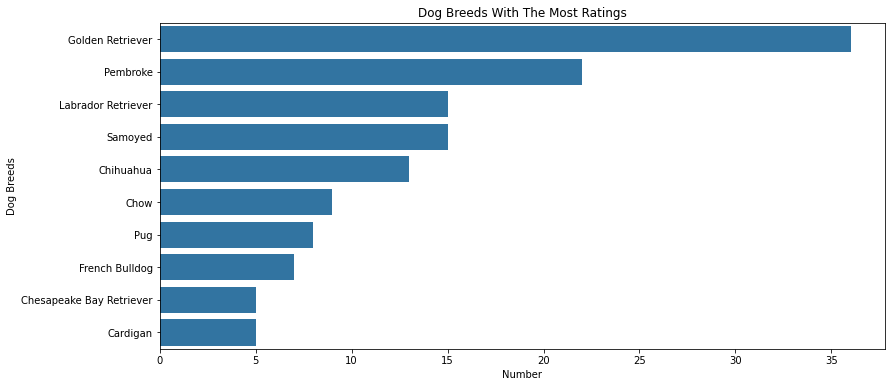

In [170]:
w = df_top_ratings['dog_breed'].value_counts().index[:10]
base_color = sns.color_palette()[0]
sns.countplot(data = df_top_ratings, y = df_top_ratings['dog_breed'], color = base_color, order = w);
plt.xlabel("Number")
plt.ylabel("Dog Breeds")
plt.title('Dog Breeds With The Most Ratings');

### Question 6

What do breeds have the highest retweets?

In [171]:
df_top_retweets = df123_clean[df123_clean['retweet_count'] > 5000]
df_top_retweets.shape

(165, 9)

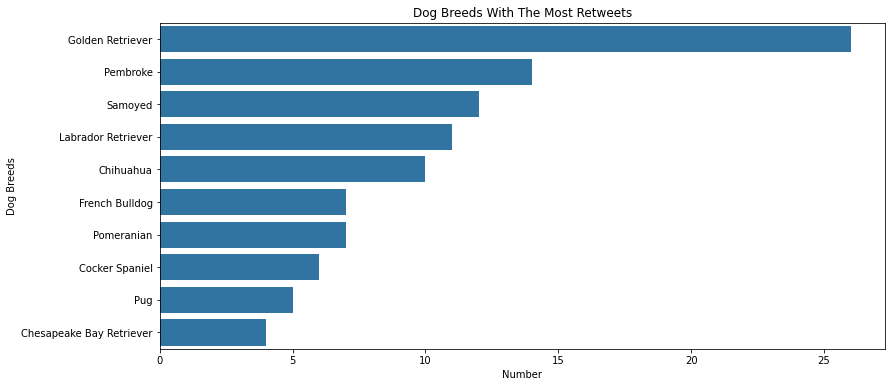

In [172]:
w = df_top_retweets['dog_breed'].value_counts().index[:10]
base_color = sns.color_palette()[0]
sns.countplot(data = df_top_retweets, y = df_top_retweets['dog_breed'], color = base_color, order = w);
plt.xlabel("Number")
plt.ylabel("Dog Breeds")
plt.title('Dog Breeds With The Most Retweets');

### Question 7

What do breeds have the highest likes?

In [173]:
df_top_favorites = df123_clean[df123_clean['favorite_count'] > 10000]
df_top_favorites.shape

(414, 9)

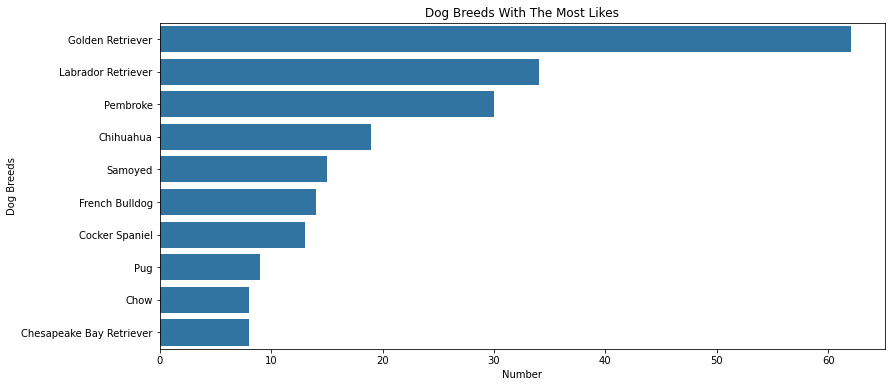

In [174]:
w = df_top_favorites['dog_breed'].value_counts().index[:10]
base_color = sns.color_palette()[0]
sns.countplot(data = df_top_favorites, y = df_top_favorites['dog_breed'], color = base_color, order = w);
plt.xlabel("Number")
plt.ylabel("Dog Breeds")
plt.title('Dog Breeds With The Most Likes');

### Conclusion

We have successfully gathered, cleaned and visualized the data for the WeRateDogs twitter account and the experience has been quite interesting.

A detailed report is provided as supporting documents and in it we have included a detailed summary and conclusion.